## Plot electrical lines

In [1]:
import pandas as pd
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt

In [2]:
df_LMD_nov = pd.read_csv('../data/raw/SET-LMD-nov-2013.csv')
df_LMD_dec = pd.read_csv('../data/raw/SET-LMD-dec-2013.csv')
df_LMD = pd.concat([df_LMD_nov, df_LMD_dec], ignore_index=True)

In [3]:
df_CSD = pd.read_csv('../data/raw/SET-CSD.csv')

In [4]:
df_grid = gpd.read_file('../data/raw/trentino-grid.geojson')

In [24]:
df_twitter = pd.read_csv('../data/interim/twitter_weather.csv')
df_twitter = df_twitter.rename(columns={"geometry_x": "geometry"})
df_twitter['geometry'] = df_twitter['geometry'].apply(wkt.loads)
df_twitter = gpd.GeoDataFrame(df_twitter)
df_twitter = df_twitter.set_crs('EPSG:4326')

In [25]:
df_lines = pd.merge(df_CSD, df_grid, left_on='SQUAREID', right_on='cellId', how='left').drop('cellId', axis=1)

In [26]:
df_lines = gpd.GeoDataFrame(df_lines)

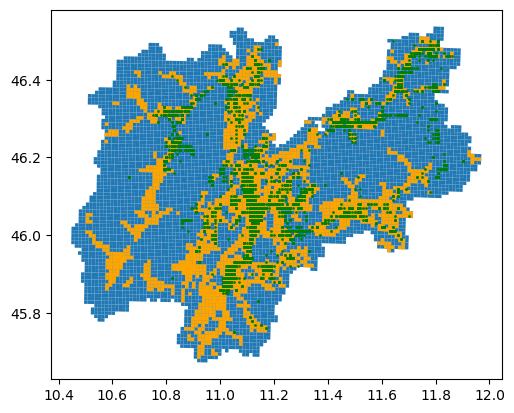

In [29]:
ax = df_grid.plot()
df_lines.plot(ax=ax, color='orange')
df_twitter.plot(ax=ax, color='g', markersize=1)
plt.savefig('isInLine.png', dpi=500)